In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler


In [3]:
# Loading the Iris dataset
iris = load_iris()

In [5]:
# Creating a DataFrame with feature data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df['species'] = iris.target

In [9]:
# Droping the species column as this is an unsupervised learning problem (clustering)
df.drop('species', axis=1, inplace=True)

In [11]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


1) Provide a brief description of how KMeans clustering works.
KMeans clustering partitions data into k clusters by:
- Randomly initializing k centroids.
- Assigning each point to the nearest centroid.
- Recomputing centroids as the mean of all points in the cluster.
- Repeating steps 2–3 until convergence.

2) Explain why KMeans clustering might be suitable for the Iris dataset.
The Iris dataset has three species (natural clusters). KMeans works well on compact, spherical clusters, which generally applies to Iris data in 2D/3D feature space.

In [13]:
# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

C:\Users\wowbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


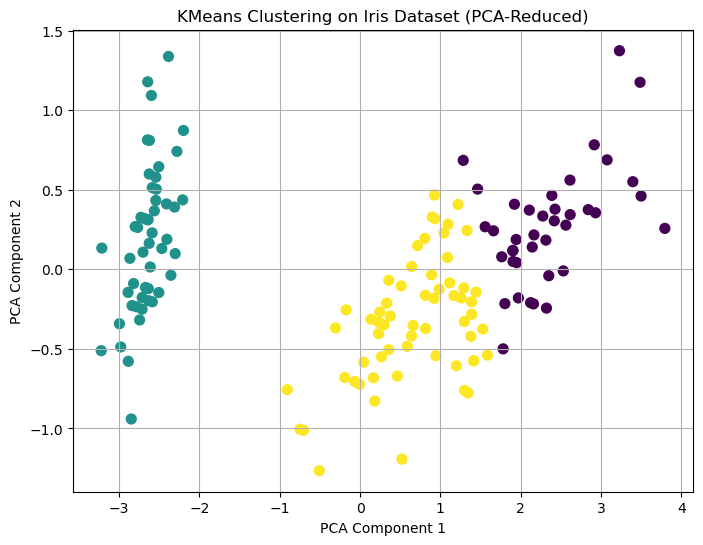

In [17]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering on Iris Dataset (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

1) Provide a brief description of how Hierarchical clustering works.
Hierarchical clustering builds nested clusters by either:
- Agglomerative (bottom-up): Each point starts as its own cluster, merging based on distance.
- Divisive (top-down): Start with one cluster and split recursively.
Uses a dendrogram to decide cluster cut-off.

2) Explain why Hierarchical clustering might be suitable for the Iris dataset.
- Does not require predefined number of clusters.
- Iris dataset is small, making it practical for hierarchical approaches.
- Dendrogram helps explore natural groupings.

In [19]:
# Standardizing data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

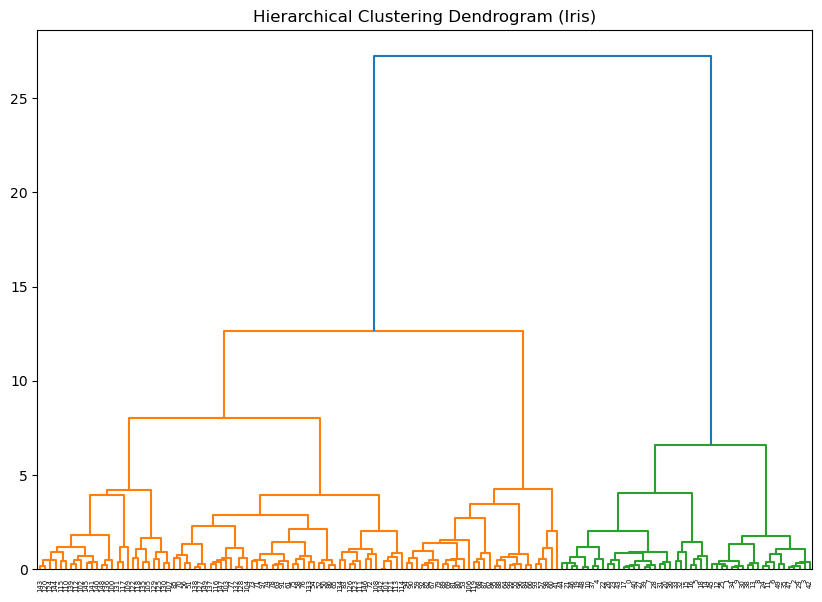

In [21]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Iris)')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(df_scaled)

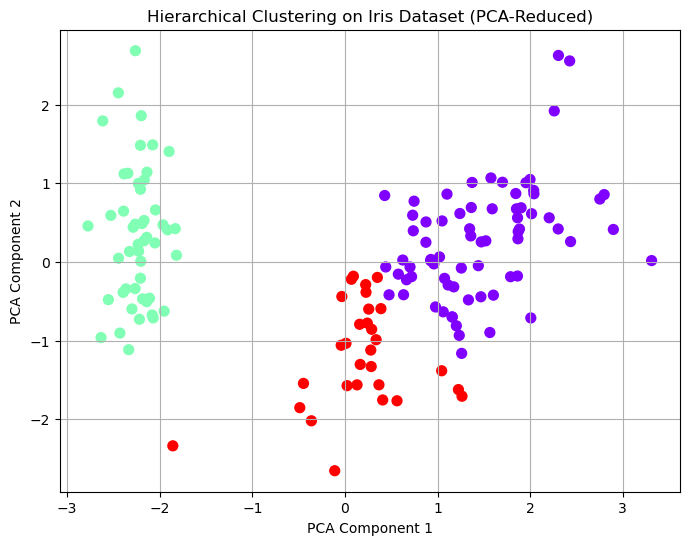

In [25]:
df_pca_hc = PCA(n_components=2).fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_hc[:, 0], df_pca_hc[:, 1], c=hc_labels, cmap='rainbow', s=50)
plt.title('Hierarchical Clustering on Iris Dataset (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()